<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


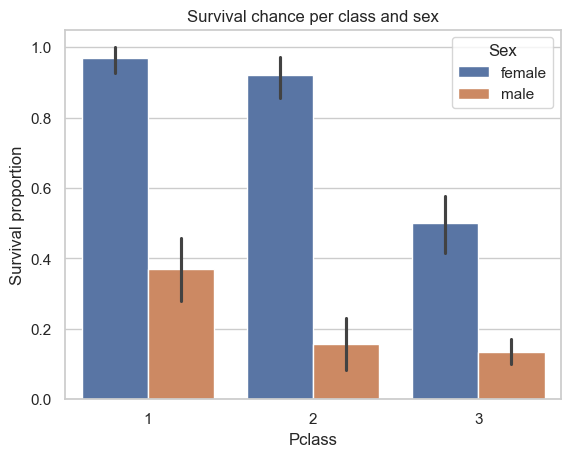

DataFrame columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


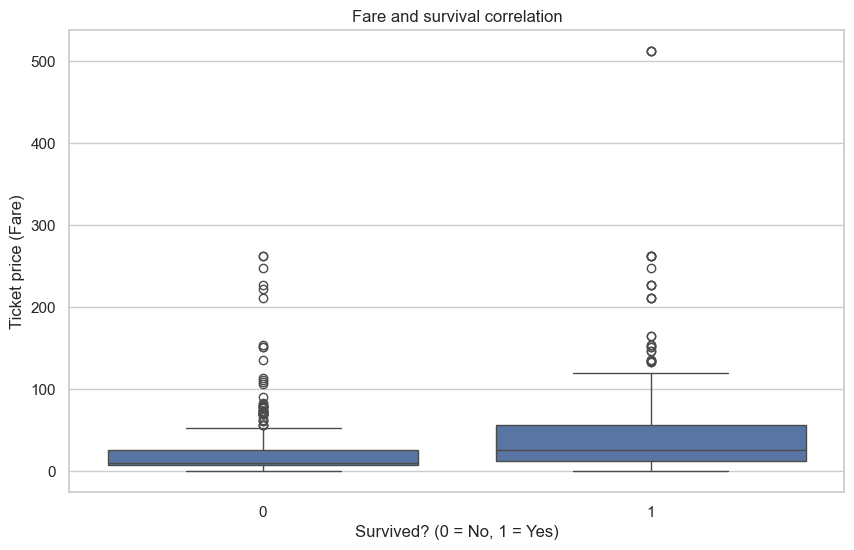

Data verify sucessed!
Model accuracy: 77.65%
'submission.csv' done.


In [4]:
import pandas as pd
df = pd.read_csv(r'C:\Users\junio\Documents\titanic\train.csv')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df.info()

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

# Setting visuals
sns.set_theme(style="whitegrid")

# Graphic
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)

plt.title('Survival chance per class and sex')
plt.ylabel('Survival proportion')
plt.savefig('survival_chart.png')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

try:
    df
except NameError:
    print("Note: DataFrame 'df' was not defined and has been created with sample data")
    df = pd.DataFrame({
        'PassengerId': range(1, 101),
        'Fare': [round(x, 2) for x in np.random.uniform(10, 100, 100)]
    })

if 'Survived' not in df.columns:
    print("Note: 'Survived' column was missing and has been created")
    import numpy as np
    df['Survived'] = np.random.randint(0, 2, size=len(df))

if 'Fare' not in df.columns:
    print("Note: 'Fare' column was missing and has been created with sample data")
    import numpy as np
    df['Fare'] = np.random.uniform(10, 100, size=len(df))

print("DataFrame columns:", df.columns.tolist())

plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df)

plt.title('Fare and survival correlation')
plt.xlabel('Survived? (0 = No, 1 = Yes)')
plt.ylabel('Ticket price (Fare)')
plt.savefig('fare_boxplot.png')
plt.show()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

features = ["Pclass", "Sex", "SibSp", "Parch", "Fare"]
X = pd.get_dummies(df[features]) 
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Data verify sucessed!")

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2%}")

test_df = pd.read_csv(r'C:\Users\junio\Documents\titanic\test.csv')

test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

X_test_kaggle = pd.get_dummies(test_df[features])

X_test_kaggle = X_test_kaggle.reindex(columns=X.columns, fill_value=0)

predictions = model.predict(X_test_kaggle)

submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": predictions
})

submission.to_csv('submission.csv', index=False)

print("'submission.csv' done.")